In [1]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from sklearn.ensemble import AdaBoostClassifier
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np

filename = 'df_imputed_scaled_OHE_reduced.pkl'
df = pd.read_pickle(filename)
X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [4]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=100):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, n_jobs= -1)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [5]:
pprint('-- Model Logistic Regression')
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs')
pprint('-- Model Decision Tree')
model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


pprint('--------FINISH MODELS CREATED')

'-- Model Logistic Regression'
'-- Model Decision Tree'
'--------FINISH MODELS CREATED'


In [6]:
# dict of parameter list/distributions to sample
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation

kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
n_estimators_search=list(range(100,1100,100))
range_learning_rate = np.logspace(-5, 2, 8)

param_dist = {"n_estimators": n_estimators_search,
             'learning_rate': range_learning_rate}

pprint('----Random Search Decision Tree\n')
AdaBoost_DT = AdaBoostClassifier(base_estimator=model_Decision_Tree, random_state = 34)
DT_rs = run_randomsearch(X, y, AdaBoost_DT, param_dist, cv=kfold,
                         n_iter_search=10)


'''
pprint('----Random Search SVM_Linear\n')
AdaBoost_SVM_Linear = AdaBoostClassifier(base_estimator=model_Linear_SVM,algorithm = 'SAMME', random_state = 36)
SVM_Linear_rs = run_randomsearch(X, y, AdaBoost_SVM_Linear, param_dist, cv=10,
                         n_iter_search=10)
'''

'''
pprint('----Random Search SVM_RBF\n')
AdaBoost_SVM_RBF = AdaBoostClassifier(base_estimator=model_RBF_SVM,algorithm = 'SAMME', random_state = 37)
SVM_RBF_rs = run_randomsearch(X, y, AdaBoost_SVM_RBF, param_dist, cv=10,
                         n_iter_search=10)
'''

pprint('----Random Search Logistic_Regression\n')
AdaBoost_Logistic_Regression = AdaBoostClassifier(base_estimator=model_Logistic_Regression, random_state = 38)
Logistic_Regression_rs = run_randomsearch(X, y, AdaBoost_Logistic_Regression, param_dist, cv=kfold,
                         n_iter_search=10)



'''
pprint('----Random Search K = 65 - NN\n')
AdaBoost_model_KNN= AdaBoostClassifier(base_estimator=model_KNN, random_state = 38)
model_KNN_rs = run_randomsearch(X, y, AdaBoost_model_KNN, param_dist, cv=10,
                         n_iter_search=10)

'''



'----Random Search Decision Tree\n'


/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:166: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosti

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/ho

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encount

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encount

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/ho

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/sit

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/ho

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encoun

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.p

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/h

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encount

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:521: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site


RandomizedSearchCV took 8.42 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.779 (std: 0.023)
Parameters: {'n_estimators': 600, 'learning_rate': 0.001}

Model with rank: 2
Mean validation score: 0.777 (std: 0.025)
Parameters: {'n_estimators': 200, 'learning_rate': 0.001}

Model with rank: 3
Mean validation score: 0.772 (std: 0.021)
Parameters: {'n_estimators': 400, 'learning_rate': 0.0001}

'----Random Search Logistic_Regression\n'


/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:533: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:166: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid v

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco

/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:532: RuntimeWarning: invalid value enco


RandomizedSearchCV took 13.07 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.791 (std: 0.019)
Parameters: {'n_estimators': 600, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: 0.788 (std: 0.015)
Parameters: {'n_estimators': 400, 'learning_rate': 1.0}

Model with rank: 3
Mean validation score: 0.788 (std: 0.019)
Parameters: {'n_estimators': 500, 'learning_rate': 0.1}



"\npprint('----Random Search K = 65 - NN\n')\nAdaBoost_model_KNN= AdaBoostClassifier(base_estimator=model_KNN, random_state = 38)\nmodel_KNN_rs = run_randomsearch(X, y, AdaBoost_model_KNN, param_dist, cv=10,\n                         n_iter_search=10)\n\n"

In [8]:

AdaBoost_DT_model = AdaBoostClassifier(base_estimator= model_Decision_Tree, n_estimators =  600, learning_rate = 0.001, random_state = 34)


AdaBoost_Logistic_Regression_model = AdaBoostClassifier(base_estimator=model_Logistic_Regression,  n_estimators =  600, learning_rate = 0.1, random_state = 38)



In [10]:






from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts

classifiers=['Logistic Regression','Decision Tree']
models=[AdaBoost_Logistic_Regression_model, AdaBoost_DT_model]


fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)




Model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.1, n_estimators=600, random_state=38)
Model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.001, n_estimators=600, random_state=34)


,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Logistic Regression,0.785768,0.053468,0.801206,0.006812
Decision Tree,0.770610,0.056205,0.793356,0.009581


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Logistic Regression,0.807915,0.037990,0.821599,0.005816
Decision Tree,0.792075,0.046006,0.813463,0.009404


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Logistic Regression,0.818063,0.080022,0.815971,0.007697
Decision Tree,0.802272,0.069594,0.812560,0.011320


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Logistic Regression,0.809686,0.073182,0.827329,0.005165
Decision Tree,0.785961,0.048821,0.814665,0.016883


,Fit_time,Scoring Time
Logistic Regression,2.777067,0.229697
Decision Tree,1.104284,0.214165


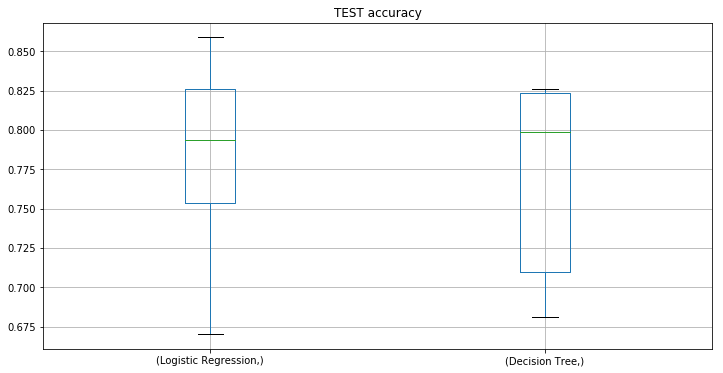

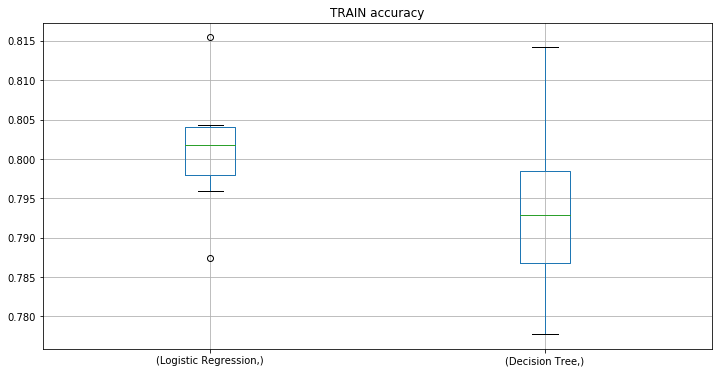

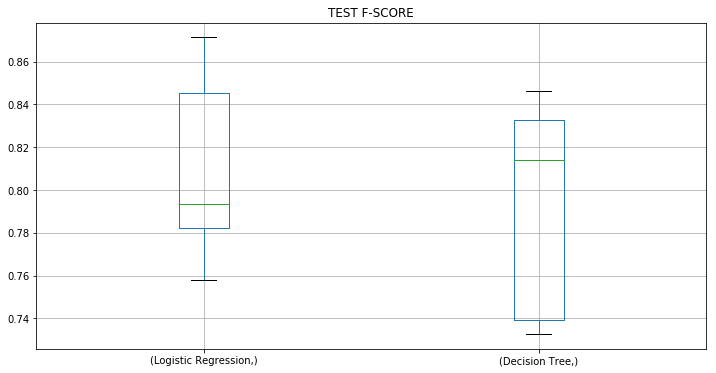

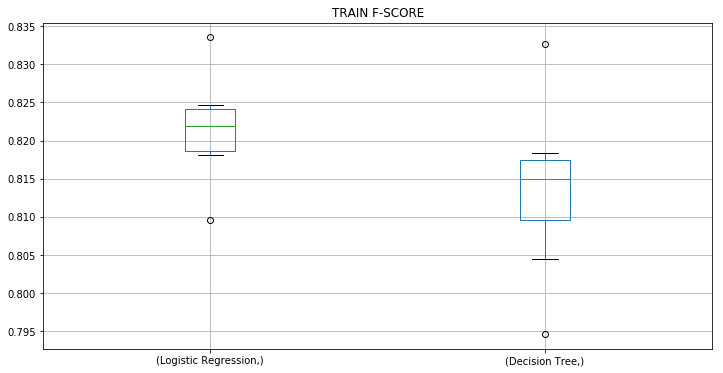

In [11]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total,index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()
plt.show()

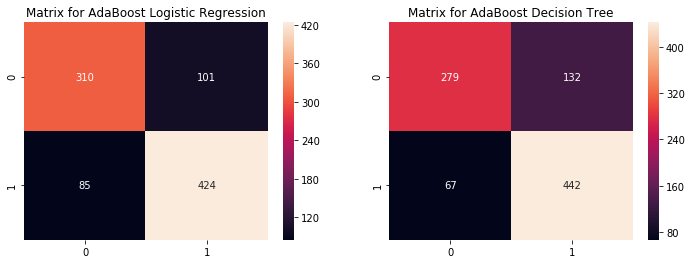

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,4))
y_pred = cross_val_predict(AdaBoost_Logistic_Regression_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for AdaBoost Logistic Regression')
y_pred = cross_val_predict(AdaBoost_DT_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Matrix for AdaBoost Decision Tree')
plt.show()

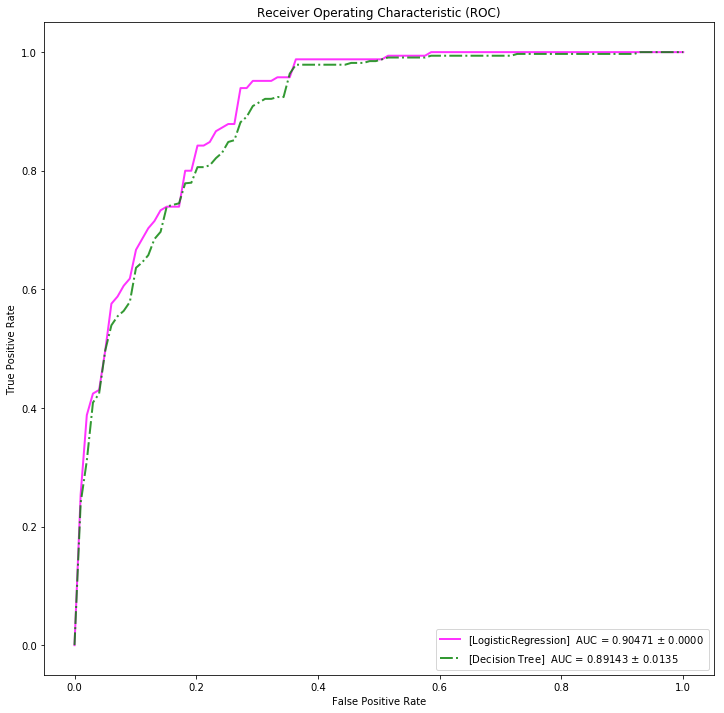

,AUC Mean,std
LogisticRegression,0.904714,0.000000
Decision Tree,0.891426,0.013473


In [12]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


models = [    
    {
        'label' : 'LogisticRegression',
        'model': AdaBoost_Logistic_Regression_model,
        'color': 'fuchsia',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': AdaBoost_DT_model, 
        'color': 'green',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
stds = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
   
    aucs_mean.append(mean_auc)
    stds.append(std_auc)
    labels.append(m['label']) 

    
   



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()

AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':stds },index = labels)       
AUCs




In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
age             920 non-null float64
sex_0           920 non-null float64
sex_1           920 non-null float64
cp_1            920 non-null float64
cp_2            920 non-null float64
cp_3            920 non-null float64
cp_4            920 non-null float64
trestbps        920 non-null float64
chol            920 non-null float64
fbs_0           920 non-null float64
fbs_1           920 non-null float64
restecg         920 non-null float64
thalach         920 non-null float64
exang_0         920 non-null float64
exang_1         920 non-null float64
oldpeak         920 non-null float64
slope_1         920 non-null float64
slope_2         920 non-null float64
slope_3         920 non-null float64
heartdisease    920 non-null int64
dtypes: float64(19), int64(1)
memory usage: 143.8 KB
